사용자가 지정하는 simple linear regression 방정식을 기반으로 y 값 도출하기 

In [4]:
%%writefile generate.py

import numpy as np 
import scipy as sp
import scipy.stats

class SLR: 
    
    def __init__(self): 
        self.equation = None
        self.low, self.high = None, None
        self.n_features = None
        self.m_samples = None
        self.noise = None
        self.noise_dist = None 
    
    def random_sampling(self, low=1, high=10, n_features=1, m_samples=25): 
        
        self.low, self.high = low, high 
        self.n_features = n_features 
        self.m_samples = m_samples
        
        x = np.array(np.random.uniform(low=self.low, high=self.high, size=(self.n_features, self.m_samples)))
        
        return x 
    
    def random_treatment(self, x, n_features=1, m_samples=25, noise=0.1, noise_dist='Normal'):  
        
        self.x = x  
        self.n_features = n_features  
        self.m_samples = m_samples 
        self.noise = noise  
        self.noise_dist = noise_dist
        
        y = np.empty([self.n_features, self.m_samples])
        y_hat = 0.5*self.x + 1  
    
        for i in range (0, self.m_samples):
            y_rvs = sp.stats.norm(loc=y_hat[0,i], scale=self.noise).rvs(size=(1,100))
            y[0][i] = np.random.choice(y_rvs[0], 1)
    
        return y
    
#     def mvSLR(): 
#         pass 
    
#     def MLR(): 
#         pass 
    
#     def mvMLR(): 
#         pass
    
#     def classification(): 
#         pass

Overwriting generate.py


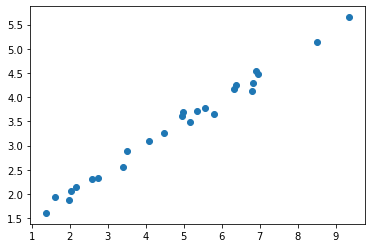

In [9]:
import generate 
import matplotlib.pylab as plt

SLR = generate.SLR() 

x = SLR.random_sampling() 
y = SLR.random_treatment(x)

plt.scatter(x,y)

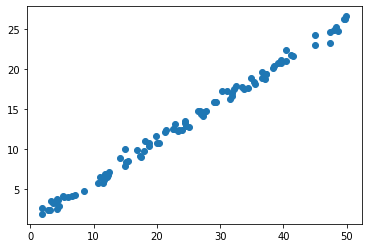

In [13]:
n_features = 1 
m_samples = 100 
noise = 0.5

x1 = SLR.random_sampling(1, 50, n_features, m_samples)
y1 = SLR.random_treatment(x1, n_features, m_samples, noise)

plt.scatter(x1,y1)